<h1> Chapter 2: How the backpropagation algorithm works </h1>

**Exercises:**

**Q) Backpropogration withg a single modified neuron:** *Suppose we modify a single neuron in a feedforward network so that the output from the neuron is given by $f(\sum_jw_jx_j+b)$, where $f$ is some function other than the sigmoid. How should we modify the backpropagation algorithm in this case?*

In this case, for the single neuron, $j$ at layer $l$ that has been modified, equation $\text(B.3)$ would become,

$$
\begin{align}
\tag{B.3}
&= \big ( \frac{\partial C}{\partial a_j^{l+1}}\frac{\partial a_j^{l+1}}{\partial z_j^{l+1}}\big ) \big ( \frac{\partial z_j^{l+1}}{\partial a_j^{l}}\frac{\partial a_j^{l}}{\partial z_j^{l}} \big ) \\
\tag{B.4}
&= \big(\delta_j^{l+1}\big)\big(\sum_k w_j^L f^{\prime}(z_j^{L-1})\big)
\end{align}
$$

**Q) Backpropagation with linear neurons:** *Suppose we replace the usual non-linear σ function with $\sigma(z)=z$ throughout the network. Rewrite the backpropagation algorithm for this case.*

If the activation function becomes $\sigma(z)=z$, then the backpropogation equations would become:

Equation 1:

$$
\begin{equation}
\delta_j^L = \frac{\partial C}{\partial a_j^L}
\end{equation}
$$

Equation 2:

$$
\begin{equation}
\vec{\delta^l} = ((\vec{w^{l+1})^T} \vec{\delta^{l+1}})
\end{equation}
$$

Equation 3:

$$
\begin{equation}
\frac{\partial C}{\partial b_{j}^l} = \delta_j^l
\end{equation}
$$

Equation 4:

$$
\begin{equation}
\frac{\partial C}{\partial w_{jk}^l} = a_k^{l-1}\delta_j^l
\end{equation}
$$

### Problem: Fully matrix-based approach to backpropagation over a mini-batch

"*Our implementation of stochastic gradient descent loops over training examples in a mini-batch.*
*It's possible to modify the backpropagation algorithm so that it computes the gradients for all training examples in a mini-batch simultaneously.*
*The idea is that instead of beginning with a single input vector, $x$, we can begin with a matrix $X=[x_1 x_2 \dots x_m]$ whose columns are the vectors in the mini-batch.*
*We forward-propagate by multiplying by the weight matrices, adding a suitable matrix for the bias terms, and applying the sigmoid function everywhere.*
*We backpropagate along similar lines.*
*Explicitly write out pseudocode for this approach to the backpropagation algorithm.*
*Modify `network.py` so that it uses this fully matrix-based approach.*
*The advantage of this approach is that it takes full advantage of modern libraries for linear algebra.*
*As a result it can be quite a bit faster than looping over the mini-batch.*
*(On my laptop, for example, the speedup is about a factor of two when run on MNIST classification problems like those we considered in the last chapter.) In practice, all serious libraries for backpropagation use this fully matrix-based approach or some variant."*

In [1]:
cd ./DeepLearningPython

E:\Google Drive\Programming\Neural networks and deep learning\DeepLearningPython


In [20]:
from mnist_loader import *
train, validate, test = load_data_wrapper()
py3train = list(train)
training_x = py3train[0]
training_y = py3train[1]

##### Explanation of training data:

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


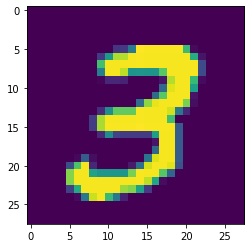

In [21]:
from matplotlib import pyplot as plt
"""
Training data, train, organised into list of 50000 tuples, (X, Y), each composed of an ((784,1), (10,1)) ndarray representing the
pixel data (28*28 = 784) of the written digit X[784] and the correct value Y[10].
"""
plt.imshow(py3train[7][0].reshape(28,28))
print(py3train[7][1])

In [22]:
mini_batch_size = 50
minibatch = py3train[0:mini_batch_size]

##### Explanation of network:

In [15]:
import network2

net = network2.Network((784,30,10))
print("Network has shape: (Layer 0, Layer 1, Layer2):")
print(net.sizes)
print('\n')
print('Weights array is:')
print(net.weights[0].shape)
print(net.weights[1].shape)
print('\n')
print('Biases array is:')
print(net.biases[0].shape)
print(net.biases[1].shape)

Network has shape: (Layer 0, Layer 1, Layer2):
(784, 30, 10)


Weights array is:
(30, 784)
(10, 30)


Biases array is:
(30, 1)
(10, 1)


##### My initial attempt at optimization by vectorizing mini-batch processing:

In [16]:
import networkv
netv = networkv.Network((784,30,10))
%timeit netv.update_mini_batch(minibatch,3.0)

E:\Google Drive\Programming\Neural networks and deep learning\networkv.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  minibatch_t = np.array(minibatch).T
E:\Google Drive\Programming\Neural networks and deep learning\networkv.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nabla_b = nabla_b + np.array([np.sum(i, axis=0) for i in delta_nabla_b])
E:\Google Drive\Programming\Neural networks and deep learning\networkv.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

3.62 ms ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


versus original...

In [17]:
import network

In [18]:
net = network.Network((784,30,10))
%timeit net.update_mini_batch(minibatch, 3.0)

4.39 ms ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Timing analysis of code...

In [19]:
%timeit netv.backprop(minibatch)
%timeit [net.backprop(i[0], i[1]) for i in minibatch]

3.33 ms ± 62.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.95 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The vectorised version runs roughly 87% faster